In [43]:
# %pip install scikit-learn

### Загрузка пакетов

In [44]:
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Загрузка датафрейма

In [45]:
churn_df = pd.read_csv('telecom_churn_clean.csv')
print(churn_df)

      Unnamed: 0  account_length  ...  customer_service_calls  churn
0              0             128  ...                       1      0
1              1             107  ...                       1      0
2              2             137  ...                       0      0
3              3              84  ...                       2      0
4              4              75  ...                       3      0
...          ...             ...  ...                     ...    ...
3328        3328             192  ...                       2      0
3329        3329              68  ...                       3      0
3330        3330              28  ...                       2      0
3331        3331             184  ...                       2      0
3332        3332              74  ...                       0      0

[3333 rows x 20 columns]


In [46]:
print(churn_df.columns)

Index(['Unnamed: 0', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge', 'customer_service_calls',
       'churn'],
      dtype='object')


### Разделим переменные на целевую и независимые

In [47]:
y = churn_df['churn'].values
X = churn_df[['account_length', 'customer_service_calls']].values

In [48]:
print(X)

[[128   1]
 [107   1]
 [137   0]
 ...
 [ 28   2]
 [184   2]
 [ 74   0]]


In [49]:
print(y)

[0 0 0 ... 0 0 0]


### Построение модели

In [50]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X, y)

,n_neighbors,6
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


### Создание набора для тестирования

In [51]:
X_new = np.array([
    [30, 18],
    [107, 24], # 1
    [213, 11],
    [200, 25],
    [100, 5],
    [280, 0],
    [5, 25],
    [5, 75],
    [36, 75], # 1
    [36, 0]
])

### Предсказание

In [52]:
y_pred = knn.predict(X_new)
print(y_pred)

[0 1 0 0 0 0 0 0 1 0]


### Разбитие данных

In [53]:
from sklearn.model_selection import train_test_split
X = churn_df.drop(['churn', 'Unnamed: 0'], axis=1).values
y = churn_df['churn'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12, stratify=y)

### Обучение и предсказание

In [54]:
knn.fit(X_train, y_train)
print(knn.score(X_test, y_test))

0.8725637181409296


### Создание множества соседей

In [60]:
neighbors = np.arange(1, 31)
train_accuracies = {}
test_accuracies = {}

for neighbor in neighbors:
    knn = KNeighborsClassifier(n_neighbors=neighbor)
    knn.fit(X_train, y_train)
    train_accuracies[neighbor] = knn.score(X_train, y_train)
    test_accuracies[neighbor] = knn.score(X_test, y_test)

print(neighbors)
print(train_accuracies)
print(test_accuracies)


[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30]
{1: 1.0, 2: 0.9047261815453863, 3: 0.9058514628657164, 4: 0.8934733683420856, 5: 0.8953488372093024, 6: 0.8897224306076519, 7: 0.8882220555138785, 8: 0.8870967741935484, 9: 0.8863465866466617, 10: 0.8837209302325582, 11: 0.8848462115528882, 12: 0.8818454613653414, 13: 0.881470367591898, 14: 0.8803450862715679, 15: 0.8825956489122281, 16: 0.8788447111777945, 17: 0.8818454613653414, 18: 0.8777194298574643, 19: 0.8795948987246812, 20: 0.8754688672168042, 21: 0.8777194298574643, 22: 0.8747186796699175, 23: 0.8758439609902475, 24: 0.8728432108027007, 25: 0.873218304576144, 26: 0.8717179294823706, 27: 0.8724681170292573, 28: 0.8717179294823706, 29: 0.8735933983495874, 30: 0.8702175543885972}
{1: 0.7961019490254873, 2: 0.8605697151424287, 3: 0.8470764617691154, 4: 0.8710644677661169, 5: 0.8695652173913043, 6: 0.8725637181409296, 7: 0.8710644677661169, 8: 0.8680659670164917, 9: 0.8680659670164917, 10: 

### Оценка модели от количества соседей

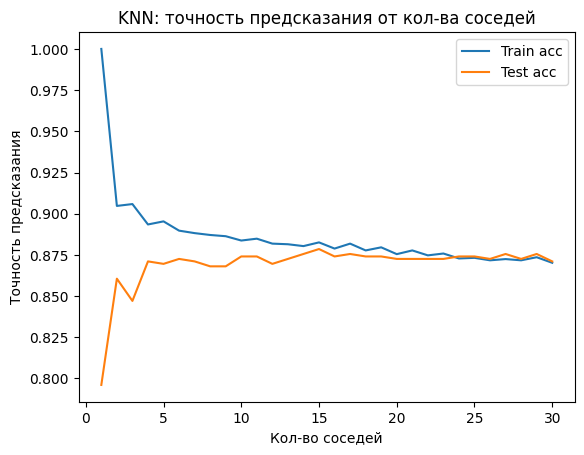

In [61]:
plt.title('KNN: точность предсказания от кол-ва соседей')
plt.plot(neighbors, train_accuracies.values(), label='Train acc')
plt.plot(neighbors, test_accuracies.values(), label='Test acc')
plt.legend()
plt.xlabel('Кол-во соседей')
plt.ylabel('Точность предсказания')
plt.show()